<a href="https://colab.research.google.com/github/rexwotan-A01840088/Ciencia-y-Analitica-de-datos/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Rex Wotan Dominguez Chang
*   MATRÍCULA: A01840088

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

In [12]:
loan_df = pd.read_csv('personal_loan.csv')
loan_df = loan_df.set_index('ID')
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   object 
 9   Securities Account  5037 non-null   object 
 10  CD Account          5037 non-null   object 
 11  Online              5037 non-null   object 
 12  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 550.9+ KB


# Limpieza

2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

In [13]:

# ==========================================
# Limpieza y validación de datos (step-by-step)
# Dataset: personal_loan.csv
# ==========================================
import pandas as pd
import numpy as np
import io
import re

# ---------------------------------------------------
# 0) Carga y preparación
# ---------------------------------------------------
# Sube el archivo a la raíz de Colab (icono carpeta -> subir)
loan_df = pd.read_csv('personal_loan.csv')

# (Opcional) si quieres que ID sea índice:
# loan_df = loan_df.set_index('ID')

print("Shape inicial:", loan_df.shape)

# ---------------------------------------------------
# 1) Estadísticas descriptivas de numéricas
#    - Incluye percentiles extendidos para "examinar cuidadosamente"
# ---------------------------------------------------
num_cols = [c for c in loan_df.columns if loan_df[c].dtype in ['int64', 'float64']]
desc_num = loan_df[num_cols].describe(percentiles=[.01,.05,.1,.25,.5,.75,.9,.95,.99]).T
print("\n=== Estadísticas descriptivas (numéricas) ===")
print(desc_num)

# ---------------------------------------------------
# 2) Visualizar registros con Age > 100 (no plausibles)
# ---------------------------------------------------
if 'Age' in loan_df.columns:
    age_over_100 = loan_df[loan_df['Age'] > 100]
    print(f"\nRegistros con Age > 100: {age_over_100.shape[0]}")
    # Mostrar algunas columnas informativas si existen
    cols_show = [c for c in ['ID','Age','Experience','Income','ZIP Code','Education','Family'] if c in loan_df.columns]
    print(age_over_100[cols_show].head(20) if not age_over_100.empty else "(No hay)")

# ---------------------------------------------------
# 3) Reglas de limpieza y justificación
#    Cada regla agrega índices a eliminar y un mensaje de justificación.
# ---------------------------------------------------
reasons = {}  # dict: nombre_regla -> lista de índices (enteros del índice actual del DF)
def add_reason(name, idx_list):
    # Almacena índices únicos por motivo
    if idx_list:
        reasons[name] = sorted(set(idx_list))

# --- 3.1 Edad > 100 (no plausible para clientes bancarios) ---
if 'Age' in loan_df.columns:
    add_reason("Age > 100 (no plausible)", loan_df.index[loan_df['Age'] > 100].tolist())

# --- 3.2 Experience < 0 (imposible) ---
if 'Experience' in loan_df.columns:
    add_reason("Experience < 0 (inconsistente)", loan_df.index[loan_df['Experience'] < 0].tolist())

# --- 3.3 Experience > Age (improbable/inconsistente) ---
#     Justificación: años de experiencia no deben exceder la edad.
if set(['Experience','Age']).issubset(loan_df.columns):
    add_reason("Experience > Age (inconsistente)", loan_df.index[loan_df['Experience'] > loan_df['Age']].tolist())

# --- 3.4 ZIP Code inválido (no tiene 5 dígitos numéricos) ---
if 'ZIP Code' in loan_df.columns:
    zip_str = loan_df['ZIP Code'].astype(str).str.strip()
    idx_zip_len_bad = loan_df.index[zip_str.str.len() != 5].tolist()
    idx_zip_non_numeric = loan_df.index[~zip_str.str.fullmatch(r'\d{5}')].tolist()
    add_reason("ZIP Code longitud != 5", idx_zip_len_bad)
    add_reason("ZIP Code no numérico (no coincide \\d{5})", idx_zip_non_numeric)

# --- 3.5 Education fuera de dominio {1,2,3} ---
if 'Education' in loan_df.columns:
    # Convierte a numérico por si viene como string
    edu_num = pd.to_numeric(loan_df['Education'], errors='coerce')
    add_reason("Education ∉ {1,2,3}", loan_df.index[~edu_num.isin([1,2,3])].tolist())

# --- 3.6 Family fuera de dominio {1,2,3,4} ---
if 'Family' in loan_df.columns:
    fam_num = pd.to_numeric(loan_df['Family'], errors='coerce')
    add_reason("Family ∉ {1,2,3,4}", loan_df.index[~fam_num.isin([1,2,3,4])].tolist())

# --- 3.7 Ingresos y montos negativos (no válidos) ---
for col in ['Income','CCAvg','Mortgage']:
    if col in loan_df.columns:
        add_reason(f"{col} < 0 (inconsistente)", loan_df.index[loan_df[col] < 0].tolist())

# --- 3.8 Binarios inválidos (Personal Loan, Securities Account, CD Account, Online, CreditCard) ---
#     Justificación: valores deben estar en {0,1,'Yes','No'} (ignora mayúsculas/minúsculas y espacios)
binary_cols = [c for c in ['Personal Loan','Securities Account','CD Account','Online','CreditCard'] if c in loan_df.columns]
allowed_bin = {'0','1','YES','NO','Yes','No','yes','no'}
for c in binary_cols:
    vals = loan_df[c].astype(str).str.strip()
    bad_mask = ~vals.isin(allowed_bin)
    add_reason(f"{c} con token inválido (no ∈ {{0,1,Yes,No}})", loan_df.index[bad_mask].tolist())

# ---------------------------------------------------
# 4) Eliminar registros inválidos y reportar
# ---------------------------------------------------
initial_n = len(loan_df)

# Unir todos los índices a eliminar (únicos)
to_drop = sorted(set([idx for lst in reasons.values() for idx in lst]))
loan_df_clean = loan_df.drop(index=to_drop)

removed_n = initial_n - len(loan_df_clean)
removed_pct = (removed_n / initial_n * 100) if initial_n > 0 else 0.0

print("\n=== Registros eliminados por motivo ===")
for k, v in reasons.items():
    print(f"- {k}: {len(v)} filas")

print(f"\nTotal de filas eliminadas: {removed_n} de {initial_n} "
      f"({removed_pct:.3f}%)")

print("\nShape final después de limpieza:", loan_df_clean.shape)

# (Opcional) Reasignar el DataFrame 'limpio' al nombre original
loan_df = loan_df_clean.copy()


Shape inicial: (5037, 14)

=== Estadísticas descriptivas (numéricas) ===
             count          mean          std     min        1%       5%  \
ID          5037.0   2518.000000  1454.200983     0.0     50.36    251.8   
Age         5037.0     45.411356    11.646805    23.0     25.00     27.0   
Experience  5037.0     20.122494    11.461278    -3.0     -1.00      2.0   
Income      5037.0     73.898352    46.130504     8.0     10.00     18.0   
ZIP Code    5037.0  93152.865595  2119.637960  9307.0  90024.00  90072.6   
Family      5037.0      2.394679     1.151145    -3.0      1.00      1.0   
CCAvg       5037.0      1.942404     1.755954     0.0      0.00      0.1   
Education   5037.0      1.880941     0.843337     1.0      1.00      1.0   
Mortgage    5037.0     56.500695   101.657580     0.0      0.00      0.0   

                10%      25%      50%      75%      90%      95%       99%  \
ID            503.6   1259.0   2518.0   3777.0   4532.4   4784.2   4985.64   
Age       

3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

In [14]:
import pandas as pd
import numpy as np

# --------------------------------------------------------
# (Opcional) Carga rápida si aún no tienes loan_df:
# loan_df = pd.read_csv('personal_loan.csv')
# --------------------------------------------------------

# ========================================================
# 1) Estadísticas descriptivas de variables de texto
#    (object y category) + frecuencias por categoría
# ========================================================

# Identificamos columnas de texto (object o category)
cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("==> Columnas categóricas detectadas:", cat_cols)

# Tabla resumen (n_unique, top, freq_top, missing) por columna
summary_rows = []
for c in cat_cols:
    # Convertimos a 'string' para poder usar .str de forma segura y recortar espacios
    s = loan_df[c].astype('string')  # mantiene <NA> como NA, no "nan"
    s = s.str.strip()                # recorta espacios
    # Estadísticas
    vc = s.value_counts(dropna=False)    # frecuencias absolutas
    n_unique = s.nunique(dropna=True)
    top = vc.index[0] if len(vc) else pd.NA
    freq_top = int(vc.iloc[0]) if len(vc) else 0
    missing = int(s.isna().sum())

    summary_rows.append({
        'columna': c,
        'n_unique': n_unique,
        'top': top,
        'freq_top': freq_top,
        'missing': missing
    })

    # Impresión completa de frecuencias (si hay cardinalidad muy alta, puedes limitar con .head(10))
    print(f"\n===== Frecuencias en '{c}' =====")
    print(vc)  # usa .head(10) si prefieres ver solo las 10 más frecuentes

summary_text = pd.DataFrame(summary_rows).sort_values('columna')
print("\n=== Resumen descriptivo de columnas de texto ===")
print(summary_text)

# (Opcional) Exportar el resumen a CSV
# summary_text.to_csv('categorical_summary.csv', index=False)

# ========================================================
# 2) Unificación de columnas binarias a formato 0/1
#    - Acepta tokens: 0/1, Yes/No, Y/N, True/False, Si/Sí, T/F
#    - Reporta tokens no reconocidos
# ========================================================

# Ajusta esta lista a las columnas binarias reales de tu dataset:
binary_cols = [c for c in ['Personal Loan','Securities Account','CD Account','Online','CreditCard'] if c in loan_df.columns]

# Normalizador a 0/1 con tolerancia de formatos comunes
def to_binary(x):
    if pd.isna(x):
        return np.nan
    t = str(x).strip().lower()
    truthy = {'1','yes','y','si','sí','true','t'}
    falsy  = {'0','no','n','false','f'}
    if t in truthy: return 1
    if t in falsy:  return 0
    # Si llega aquí, no se reconoce; devolvemos NA para reportar
    return np.nan

print("\n=== Unificación de columnas binarias a {0,1} ===")
for c in binary_cols:
    s_orig = loan_df[c]
    s_norm = s_orig.map(to_binary)

    # Tokens no reconocidos (no NA originales, pero resultaron en NA tras map)
    unknown_mask = s_norm.isna() & s_orig.notna()
    unknown_tokens = sorted(set(s_orig[unknown_mask].astype(str).str.strip().str.lower()))
    if unknown_tokens:
        print(f"[ADVERTENCIA] Tokens no reconocidos en '{c}': {unknown_tokens}")

    # Si quieres forzar NA a 0 (o a 1), descomenta la siguiente línea; por defecto, mantenemos NA:
    # s_norm = s_norm.fillna(0)

    # Asignar de vuelta y tipificar como category (0/1)
    loan_df[c] = s_norm.astype('Int64')   # mantiene NA si existen
    loan_df[c] = loan_df[c].astype('category')

    # Imprimir frecuencias finales (incluyendo NA si quedaron)
    print(f"\nFrecuencias unificadas en '{c}' (0/1):")
    print(loan_df[c].value_counts(dropna=False))

# (Opcional) Verificación rápida de dominios
for c in binary_cols:
    dominios = sorted(loan_df[c].dropna().astype(int).unique().tolist())
    print(f"Dominios en '{c}': {dominios}")

==> Columnas categóricas detectadas: ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

===== Frecuencias en 'Personal Loan' =====
Personal Loan
0      3475
No     1017
Yes     368
1       117
Name: count, dtype: Int64

===== Frecuencias en 'Securities Account' =====
Securities Account
No     2693
0      1765
Yes     390
1       129
Name: count, dtype: Int64

===== Frecuencias en 'CD Account' =====
CD Account
No     2462
0      2212
1       163
Yes     140
Name: count, dtype: Int64

===== Frecuencias en 'Online' =====
Online
Yes    1700
No     1628
1      1275
0       374
Name: count, dtype: Int64

===== Frecuencias en 'CreditCard' =====
CreditCard
0      2628
Yes     907
No      885
1       557
Name: count, dtype: Int64

=== Resumen descriptivo de columnas de texto ===
              columna  n_unique  top  freq_top  missing
2          CD Account         4   No      2462        0
4          CreditCard         4    0      2628        0
3              Online  

4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.

In [15]:
import pandas as pd

# --- Supuesto: ya tienes loan_df cargado ---
# p.ej. loan_df = pd.read_csv('personal_loan.csv').set_index('ID')

print("Shape antes de eliminar duplicados:", loan_df.shape)

# 1) Duplicados por fila completa (todas las columnas)
dupe_rows_mask = loan_df.duplicated(keep='first')
n_dupe_rows = int(dupe_rows_mask.sum())
print(f"Duplicados por fila completa: {n_dupe_rows}")

# 2) Duplicados por ID
#    Detecta si ID es índice o columna y arma la máscara adecuada
if loan_df.index.name == 'ID':
    dupe_id_mask = pd.Series(loan_df.index.duplicated(keep='first'), index=loan_df.index)
    n_dupe_id = int(dupe_id_mask.sum())
    print(f"Duplicados por ID (índice): {n_dupe_id}")
elif 'ID' in loan_df.columns:
    dupe_id_mask = loan_df.duplicated(subset=['ID'], keep='first')
    n_dupe_id = int(dupe_id_mask.sum())
    print(f"Duplicados por ID (columna): {n_dupe_id}")
else:
    # Si no hay ID ni como índice ni como columna, no hay duplicados por ID que revisar
    dupe_id_mask = pd.Series(False, index=loan_df.index)
    n_dupe_id = 0
    print("No se encontró 'ID' ni como índice ni como columna; se omite chequeo por ID.")

# 3) Eliminar duplicados (unión de criterios)
initial_n = len(loan_df)
to_remove_mask = dupe_rows_mask | dupe_id_mask
loan_df = loan_df[~to_remove_mask].copy()

removed_n = initial_n - len(loan_df)
removed_pct = (removed_n / initial_n * 100) if initial_n else 0.0
print(f"Eliminados por duplicados (total): {removed_n} ({removed_pct:.3f}%)")
print("Shape después de eliminar duplicados:", loan_df.shape)

# 4) Reiniciar el índice para una secuencia continua
#    - Si 'ID' es índice, reset_index lo convertirá a columna y creará RangeIndex 0..n-1
#    - Si 'ID' ya era columna, usamos drop=True para solo reiniciar la numeración
if loan_df.index.name is not None:  # p. ej., 'ID'
    loan_df = loan_df.reset_index()        # mantiene 'ID' como columna
else:
    loan_df = loan_df.reset_index(drop=True)
loan_df = loan_df.set_index('ID')
print("Índice reiniciado. Shape final:", loan_df.shape)
print("Primeras filas tras reinicio de índice:")
print(loan_df.head())


Shape antes de eliminar duplicados: (4977, 14)
Duplicados por fila completa: 0
Duplicados por ID (columna): 0
Eliminados por duplicados (total): 0 (0.000%)
Shape después de eliminar duplicados: (4977, 14)
Índice reiniciado. Shape final: (4977, 13)
Primeras filas tras reinicio de índice:
    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                          
0    25           1      49     91108       4    1.6        1.0         0   
1    45          19      34     90089       3    1.5        1.0         0   
2    39          15      11     94720       1    1.0        1.0         0   
3    35           9     100     94112       1    2.7        2.0         0   
4    35           8      45     91330       4    1.0        2.0         0   

   Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                
0              0                  1   

5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [16]:
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 1) ZIP Code como nominal (object)
#    - Normaliza a string, recorta espacios, rellena a 5 dígitos
# ----------------------------------------------------
if 'ZIP Code' in loan_df.columns:
    loan_df['ZIP Code'] = (
        loan_df['ZIP Code']
        .astype(str)
        .str.strip()
        .str.zfill(5)
        .astype('object')
    )

# ----------------------------------------------------
# 2) Education como ordinal (category ordenada 1 < 2 < 3)
#    - Coerción a numérico; valores fuera de {1,2,3} quedan como NA
# ----------------------------------------------------
if 'Education' in loan_df.columns:
    loan_df['Education'] = pd.to_numeric(loan_df['Education'], errors='coerce')
    loan_df['Education'] = pd.Categorical(
        loan_df['Education'],
        categories=[1, 2, 3],
        ordered=True
    )

# ----------------------------------------------------
# 3) Binarias → category (0/1)
#    - Unifica tokens típicos (Yes/No, 1/0, True/False, Si/Sí, Y/N, T/F)
#    - Deja NA si hay tokens no reconocidos (transparencia)
# ----------------------------------------------------
binary_cols = [c for c in ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
               if c in loan_df.columns]

def to_binary(x):
    if pd.isna(x):
        return np.nan
    t = str(x).strip().lower()
    truthy = {'1', 'yes', 'y', 'si', 'sí', 'true', 't'}
    falsy  = {'0', 'no', 'n', 'false', 'f'}
    if t in truthy: return 1
    if t in falsy:  return 0
    # Si viene como número en string u objeto numérico
    try:
        v = float(t)
        if v in (0.0, 1.0):
            return int(v)
    except:
        pass
    return np.nan

for c in binary_cols:
    loan_df[c] = loan_df[c].map(to_binary).astype('Int64')   # conserva NA si existen
    loan_df[c] = loan_df[c].astype('category')               # tipifica como categoría 0/1

# (Opcional) ver dominios finales de las binarias
for c in binary_cols:
    if c in loan_df.columns and hasattr(loan_df[c].dtype, 'categories'):
        print(f"{c} → categorías: {list(loan_df[c].cat.categories)}")

# (Opcional) ver categorías de Education
if 'Education' in loan_df.columns and hasattr(loan_df['Education'].dtype, 'categories'):
    print("Education → categorías (ordenadas):", list(loan_df['Education'].cat.categories))

# ----------------------------------------------------
# 4) Listas de columnas por tipo estadístico
#    - num_cols: dtypes numéricos (int64, float64)
#    - cat_cols: dtypes categóricos (object, category)
# ----------------------------------------------------
num_cols = [c for c in loan_df.columns if str(loan_df[c].dtype) in {'int64', 'float64'}]
cat_cols = [c for c in loan_df.columns if str(loan_df[c].dtype) in {'object', 'category'}]

print("\nnum_cols:", num_cols)
print("cat_cols:", cat_cols)

# (Opcional) Si no quieres usar 'ID' en numéricas cuando es columna:
# if 'ID' in num_cols:
#     num_cols.remove('ID')

# (Opcional) Revisión final de tipos:
print("\nDtypes actuales:")
print(loan_df.dtypes)

Personal Loan → categorías: [np.int64(0), np.int64(1)]
Securities Account → categorías: [np.int64(0), np.int64(1)]
CD Account → categorías: [np.int64(0), np.int64(1)]
Online → categorías: [np.int64(0), np.int64(1)]
CreditCard → categorías: [np.int64(0), np.int64(1)]
Education → categorías (ordenadas): [1, 2, 3]

num_cols: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
cat_cols: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

Dtypes actuales:
Age                      int64
Experience               int64
Income                   int64
ZIP Code                object
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

In [17]:
import pandas as pd
import numpy as np

# ======================================================
# 1) Selección de columnas numéricas
# ======================================================
num_cols = [c for c in loan_df.columns if str(loan_df[c].dtype) in {'int64', 'float64'}]
# (Opcional) excluye ID si estuviera como numérica
if 'ID' in num_cols:
    num_cols.remove('ID')

# ======================================================
# 2) Estadísticas descriptivas + skewness + kurtosis
#    - pandas.Series.skew() → asimetría
#    - pandas.Series.kurt() → exceso de curtosis (Fisher: normal ≈ 0)
# ======================================================
desc = loan_df[num_cols].describe().T
skew = loan_df[num_cols].skew()            # asimetría
kurt = loan_df[num_cols].kurt()            # exceso de curtosis (0 ≈ normal)
summary_num = desc.copy()
summary_num['skewness'] = skew
summary_num['kurtosis'] = kurt

print("=== Estadísticas numéricas con asimetría y curtosis ===")
print(summary_num.round(3))

# (Opcional) exportar a CSV
# summary_num.round(3).to_csv('summary_numeric_with_skew_kurt.csv')

# ======================================================
# 3) Clasificación de Age, Income, Mortgage
#    Reglas (heurísticas comunes):
#    - |skew| < 0.5 → ≈ simétrica
#    - 0.5 ≤ skew < 1 → asimetría moderada (signo según skew)
#    - |skew| ≥ 1 → asimetría alta (signo según skew)
#    - kurtosis en [-0.5, 0.5] → mesocúrtica (≈ normal)
#    - kurtosis > 0.5 → leptocúrtica (colas pesadas)
#    - kurtosis < -0.5 → platicúrtica (colas ligeras)
# ======================================================
def clasifica_asimetria(s):
    if abs(s) < 0.5:
        return '≈ simétrica'
    if 0.5 <= s < 1:
        return 'asimetría positiva moderada'
    if s >= 1:
        return 'asimetría positiva alta'
    if -1 < s <= -0.5:
        return 'asimetría negativa moderada'
    # s <= -1
    return 'asimetría negativa alta'

def clasifica_curtosis(k):
    if -0.5 <= k <= 0.5:
        return 'mesocúrtica (≈ normal)'
    elif k > 0.5:
        return 'leptocúrtica (colas pesadas)'
    else:
        return 'platicúrtica (colas ligeras)'

vars_a_clasificar = [v for v in ['Age', 'Income', 'Mortgage'] if v in summary_num.index]

clasificacion = {}
for var in vars_a_clasificar:
    s = float(summary_num.loc[var, 'skewness'])
    k = float(summary_num.loc[var, 'kurtosis'])
    clasificacion[var] = {
        'skewness': s,
        'kurtosis': k,
        'clasif_asimetria': clasifica_asimetria(s),
        'clasif_curtosis': clasifica_curtosis(k)
    }

print("\n=== Clasificación (Age, Income, Mortgage) ===")
for var, info in clasificacion.items():
    print(f"- {var}: skew={info['skewness']:.3f} → {info['clasif_asimetria']}; "
          f"kurtosis={info['kurtosis']:.3f} → {info['clasif_curtosis']}")

=== Estadísticas numéricas con asimetría y curtosis ===
             count    mean      std   min   25%   50%    75%    max  skewness  \
Age         4977.0  45.582   11.307  24.0  36.0  46.0   55.0   67.0    -0.024   
Experience  4977.0  20.356   11.299   0.0  11.0  20.0   30.0   43.0    -0.017   
Income      4977.0  73.957   46.207   8.0  39.0  64.0   98.0  224.0     0.841   
Family      4977.0   2.391    1.149   1.0   1.0   2.0    3.0    4.0     0.160   
CCAvg       4977.0   1.941    1.757   0.0   0.7   1.5    2.6   10.0     1.602   
Mortgage    4977.0  56.676  101.824   0.0   0.0   0.0  101.0  635.0     2.101   

            kurtosis  
Age           -1.159  
Experience    -1.132  
Income        -0.049  
Family        -1.404  
CCAvg          2.665  
Mortgage       4.744  

=== Clasificación (Age, Income, Mortgage) ===
- Age: skew=-0.024 → ≈ simétrica; kurtosis=-1.159 → platicúrtica (colas ligeras)
- Income: skew=0.841 → asimetría positiva moderada; kurtosis=-0.049 → mesocúrtica (≈ no

7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

=== Estadísticas numéricas con asimetría y curtosis ===
             count    mean      std   min   25%   50%    75%    max  skewness  \
Age         4977.0  45.582   11.307  24.0  36.0  46.0   55.0   67.0    -0.024   
Experience  4977.0  20.356   11.299   0.0  11.0  20.0   30.0   43.0    -0.017   
Income      4977.0  73.957   46.207   8.0  39.0  64.0   98.0  224.0     0.841   
Family      4977.0   2.391    1.149   1.0   1.0   2.0    3.0    4.0     0.160   
CCAvg       4977.0   1.941    1.757   0.0   0.7   1.5    2.6   10.0     1.602   
Mortgage    4977.0  56.676  101.824   0.0   0.0   0.0  101.0  635.0     2.101   

            kurtosis  
Age           -1.159  
Experience    -1.132  
Income        -0.049  
Family        -1.404  
CCAvg          2.665  
Mortgage       4.744  

=== Clasificación (Age, Income, Mortgage) ===
- Age: skew=-0.024 → ≈ simétrica; kurtosis=-1.159 → platicúrtica (colas ligeras)
- Income: skew=0.841 → asimetría positiva moderada; kurtosis=-0.049 → mesocúrtica (≈ no

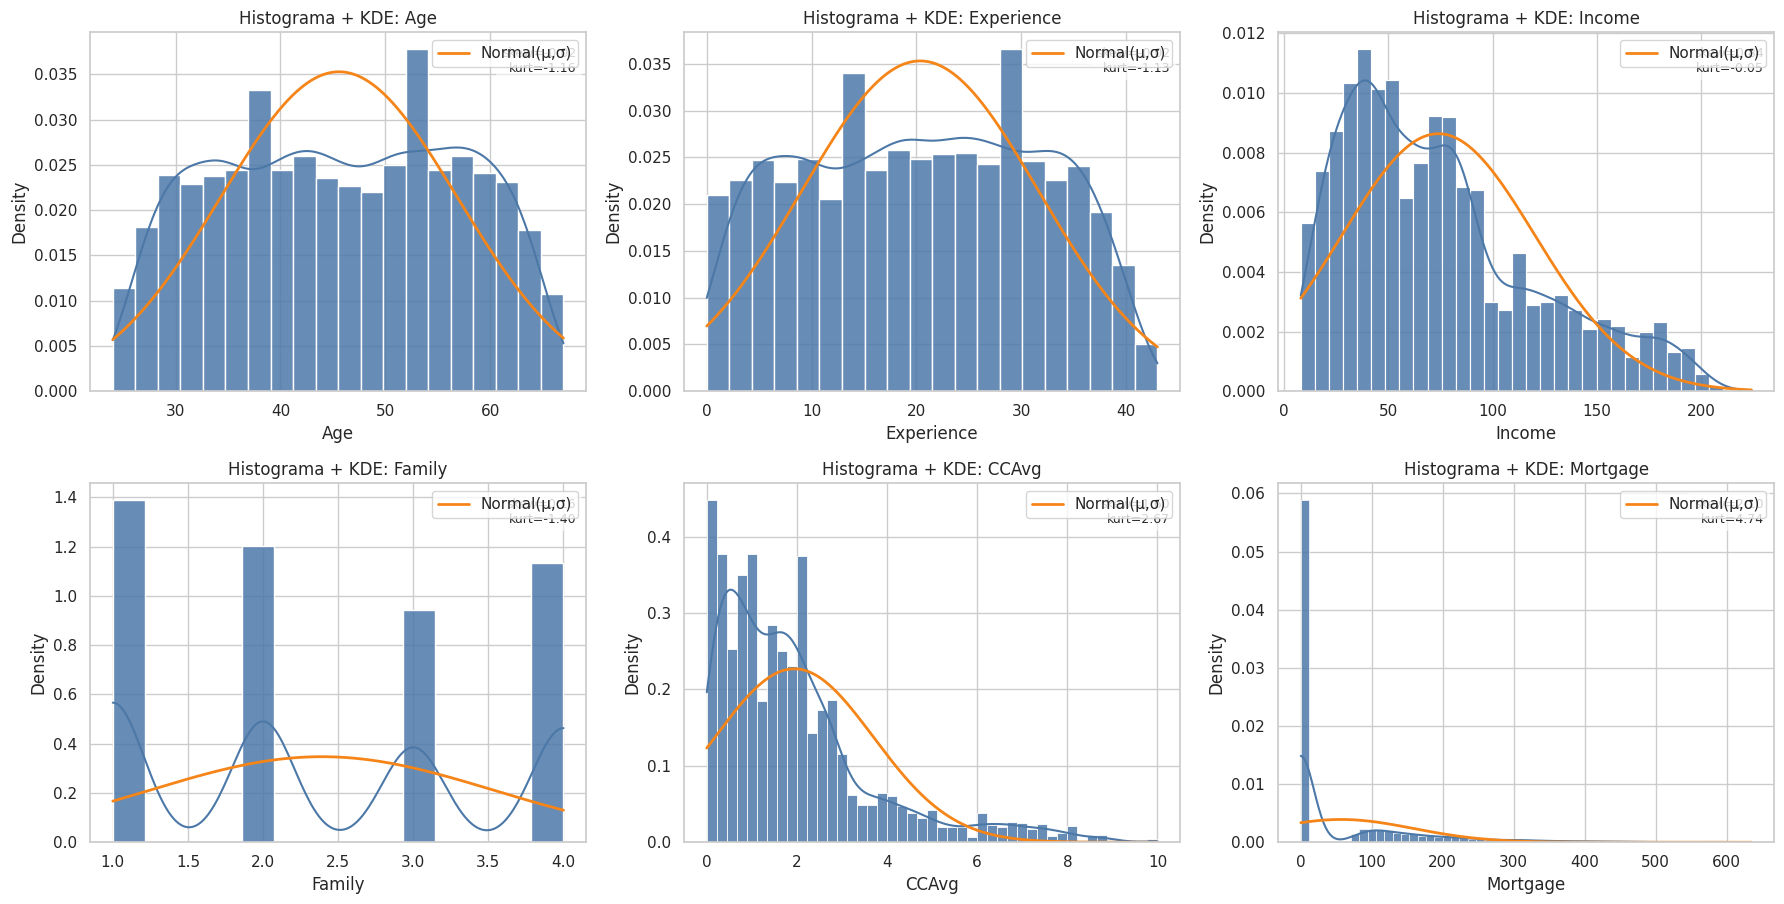


=== Comentario de forma esperado vs. histogramas ===
• Age: skew=-0.02 (≈ simétrica), kurtosis=-1.16 (platicúrtica (colas ligeras)). Visualmente debería observarse forma aproximadamente simétrica, pico más bajo/colas ligeras (platicúrtica).
• Income: skew=0.84 (asimetría positiva moderada), kurtosis=-0.05 (mesocúrtica (≈ normal)). Visualmente debería observarse cola a la derecha (sesgo positivo), altura similar a normal (mesocúrtica).
• Mortgage: skew=2.10 (asimetría positiva alta), kurtosis=4.74 (leptocúrtica (colas pesadas)). Visualmente debería observarse cola a la derecha (sesgo positivo), pico más agudo/colas pesadas (leptocúrtica).


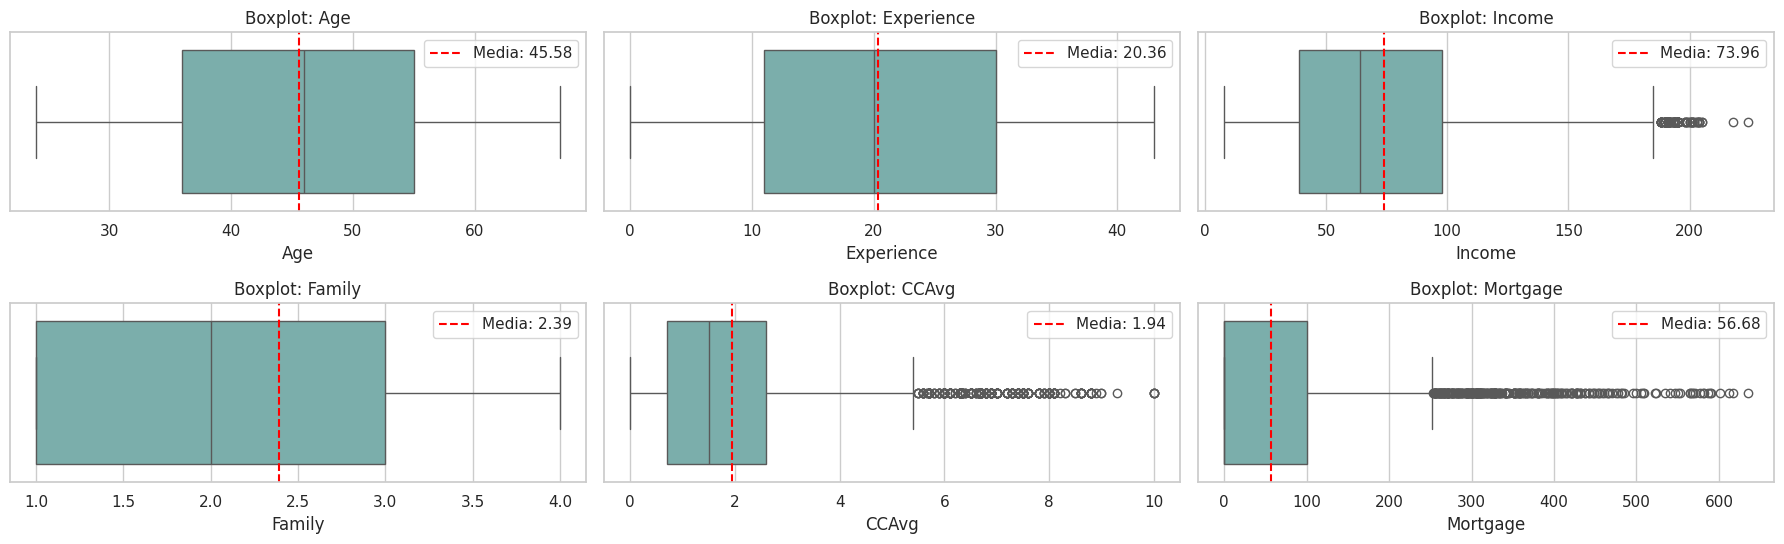


=== Media vs. Mediana (indicio de asimetría) ===
- Age: media=45.582, mediana=46.000 → media < mediana → sesgo negativo (cola izquierda)
- Experience: media=20.356, mediana=20.000 → media > mediana → sesgo positivo (cola derecha)
- Income: media=73.957, mediana=64.000 → media > mediana → sesgo positivo (cola derecha)
- Family: media=2.391, mediana=2.000 → media > mediana → sesgo positivo (cola derecha)
- CCAvg: media=1.941, mediana=1.500 → media > mediana → sesgo positivo (cola derecha)
- Mortgage: media=56.676, mediana=0.000 → media > mediana → sesgo positivo (cola derecha)


In [18]:
# ==========================================
# EDA Univariado: Numéricas
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

sns.set(style='whitegrid', context='notebook')

# ------------------------------------------
# 1) Selección de columnas numéricas
# ------------------------------------------
num_cols = [c for c in loan_df.columns if str(loan_df[c].dtype) in {'int64', 'float64'}]
if 'ID' in num_cols:  # si existe, no la analizamos
    num_cols.remove('ID')

assert len(num_cols) > 0, "No se detectaron columnas numéricas."

# ------------------------------------------
# 2) Estadísticas + skewness + kurtosis
#    (kurtosis de Fisher: normal ≈ 0)
# ------------------------------------------
desc = loan_df[num_cols].describe().T
skew = loan_df[num_cols].skew()
kurt = loan_df[num_cols].kurt()
summary_num = desc.copy()
summary_num['skewness'] = skew
summary_num['kurtosis'] = kurt

print("=== Estadísticas numéricas con asimetría y curtosis ===")
print(summary_num.round(3))

# ------------------------------------------
# 3) Clasificación (Age, Income, Mortgage)
# ------------------------------------------
def clasifica_asimetria(s):
    if abs(s) < 0.5:
        return '≈ simétrica'
    if 0.5 <= s < 1:
        return 'asimetría positiva moderada' if s > 0 else 'asimetría negativa moderada'
    if abs(s) >= 1:
        return 'asimetría positiva alta' if s > 0 else 'asimetría negativa alta'

def clasifica_curtosis(k):
    if -0.5 <= k <= 0.5:
        return 'mesocúrtica (≈ normal)'
    elif k > 0.5:
        return 'leptocúrtica (colas pesadas)'
    else:
        return 'platicúrtica (colas ligeras)'

vars_a_clasificar = [v for v in ['Age','Income','Mortgage'] if v in summary_num.index]
print("\n=== Clasificación (Age, Income, Mortgage) ===")
for var in vars_a_clasificar:
    s = float(summary_num.loc[var, 'skewness'])
    k = float(summary_num.loc[var, 'kurtosis'])
    print(f"- {var}: skew={s:.3f} → {clasifica_asimetria(s)}; kurtosis={k:.3f} → {clasifica_curtosis(k)}")

# ------------------------------------------
# 4) Histogramas con KDE + curva Normal(μ,σ)
# ------------------------------------------
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.6*rows))
axes = np.atleast_1d(axes).ravel()

for i, col in enumerate(num_cols):
    ax = axes[i]
    data = loan_df[col].dropna()

    # Histograma + KDE (densidad)
    sns.histplot(data, kde=True, stat='density', bins='auto',
                 color='#4C78A8', edgecolor='white', ax=ax, alpha=0.85)

    # Curva normal de referencia con misma media y std
    mu, sigma = data.mean(), data.std(ddof=0)
    if sigma > 0:
        x = np.linspace(data.min(), data.max(), 400)
        y = norm.pdf(x, mu, sigma)
        ax.plot(x, y, color='#F58518', lw=2, label='Normal(μ,σ)')

    # Anotaciones útiles
    sk = data.skew()
    ku = data.kurt()
    ax.set_title(f'Histograma + KDE: {col}')
    ax.legend(loc='upper right')
    ax.text(0.98, 0.96, f"skew={sk:.2f}\nkurt={ku:.2f}",
            transform=ax.transAxes, ha='right', va='top',
            fontsize=9, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# ------------------------------------------
# 5) Comentario automático para Age, Income, Mortgage
#    (comparación forma ~ skew/kurtosis)
# ------------------------------------------
def comentario_forma(var):
    if var not in num_cols:
        return f"{var}: no encontrada."
    s = float(summary_num.loc[var, 'skewness'])
    k = float(summary_num.loc[var, 'kurtosis'])
    desc_s = clasifica_asimetria(s)
    desc_k = clasifica_curtosis(k)
    # Comentario corto esperado por el signo/magnitud de skew+kurt
    esperado = []
    if abs(s) < 0.5:
        esperado.append("forma aproximadamente simétrica")
    elif s > 0:
        esperado.append("cola a la derecha (sesgo positivo)")
    else:
        esperado.append("cola a la izquierda (sesgo negativo)")

    if -0.5 <= k <= 0.5:
        esperado.append("altura similar a normal (mesocúrtica)")
    elif k > 0.5:
        esperado.append("pico más agudo/colas pesadas (leptocúrtica)")
    else:
        esperado.append("pico más bajo/colas ligeras (platicúrtica)")

    return (f"{var}: skew={s:.2f} ({desc_s}), kurtosis={k:.2f} ({desc_k}). "
            f"Visualmente debería observarse {', '.join(esperado)}.")

print("\n=== Comentario de forma esperado vs. histogramas ===")
for var in vars_a_clasificar:
    print("• " + comentario_forma(var))

# ------------------------------------------
# 6) Boxplots individuales + línea de la media
# ------------------------------------------
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 2.8*rows))
axes = np.atleast_1d(axes).ravel()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(x=loan_df[col], ax=ax, color='#72B7B2')
    mean_val = loan_df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', lw=1.5, label=f'Media: {mean_val:.2f}')
    ax.set_title(f'Boxplot: {col}')
    ax.legend(loc='upper right')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# ------------------------------------------
# 7) Media vs Mediana → indicio de sesgo
# ------------------------------------------
print("\n=== Media vs. Mediana (indicio de asimetría) ===")
for col in num_cols:
    mean_v = float(loan_df[col].mean())
    med_v  = float(loan_df[col].median())
    if abs(mean_v - med_v) < 1e-9:
        rel = "≈ iguales (simetría)"
        sesgo = "≈ simétrica"
    elif mean_v > med_v:
        rel = "media > mediana"
        sesgo = "sesgo positivo (cola derecha)"
    else:
        rel = "media < mediana"
        sesgo = "sesgo negativo (cola izquierda)"
    print(f"- {col}: media={mean_v:.3f}, mediana={med_v:.3f} → {rel} → {sesgo}")

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.

Columnas categóricas detectadas: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

===== Frecuencias en 'ZIP Code' =====
(Alta cardinalidad) Top 10 categorías:
ZIP Code
94720    164
94305    124
95616    115
90095     72
93106     56
93943     55
91320     54
92037     54
94025     52
90024     51
Name: count, dtype: Int64

===== Frecuencias en 'Education' =====
Education
1    2098
3    1486
2    1393
Name: count, dtype: Int64

===== Frecuencias en 'Personal Loan' =====
Personal Loan
0    4492
1     485
Name: count, dtype: Int64

===== Frecuencias en 'Securities Account' =====
Securities Account
0    4458
1     519
Name: count, dtype: Int64

===== Frecuencias en 'CD Account' =====
CD Account
0    4674
1     303
Name: count, dtype: Int64

===== Frecuencias en 'Online' =====
Online
1    2975
0    2002
Name: count, dtype: Int64

===== Frecuencias en 'CreditCard' =====
CreditCard
0    3513
1    1464
Name: count, dtype: Int64

=== Resume

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


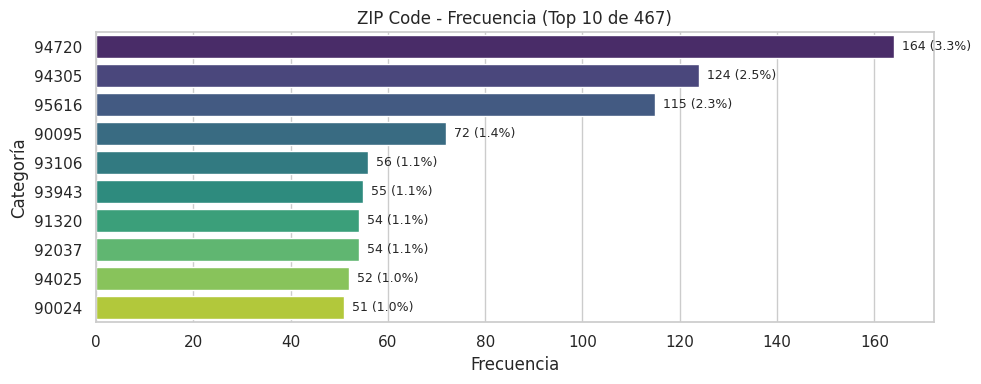

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


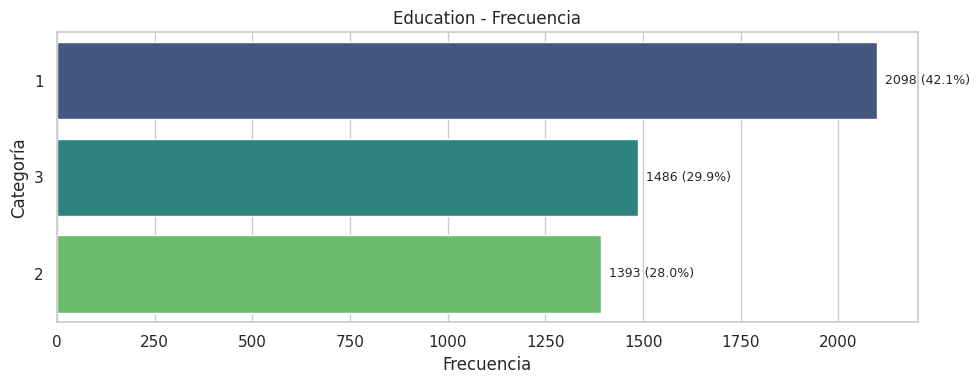

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


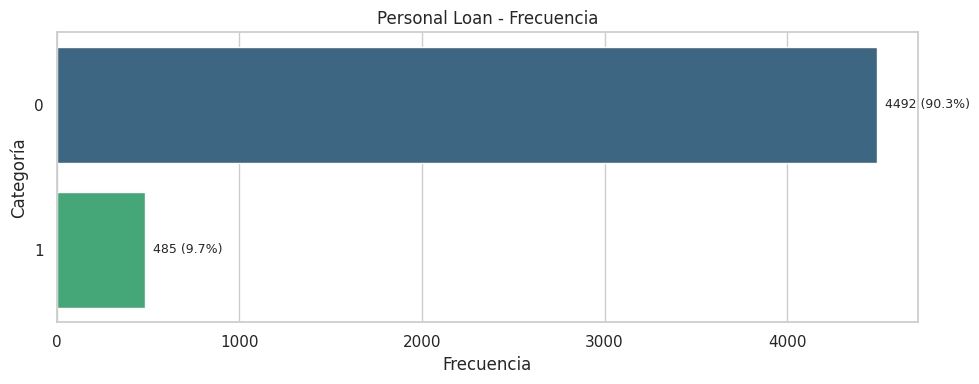

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


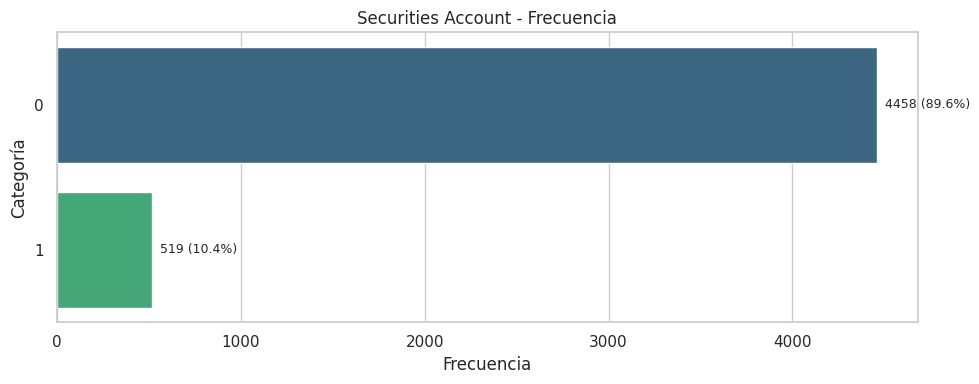

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


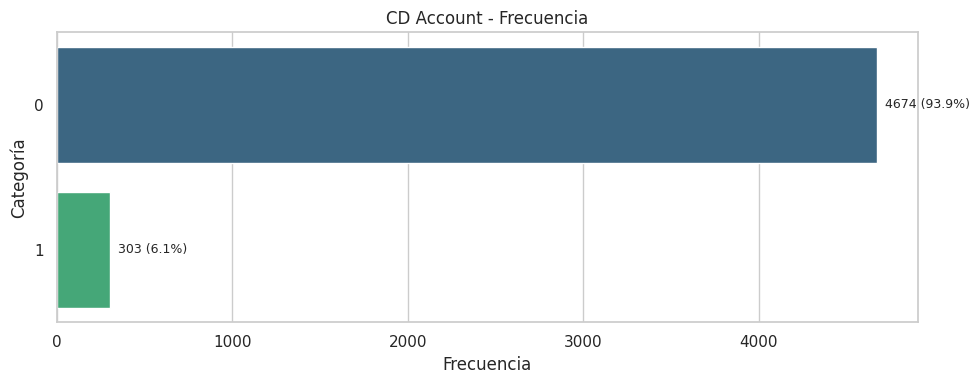

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


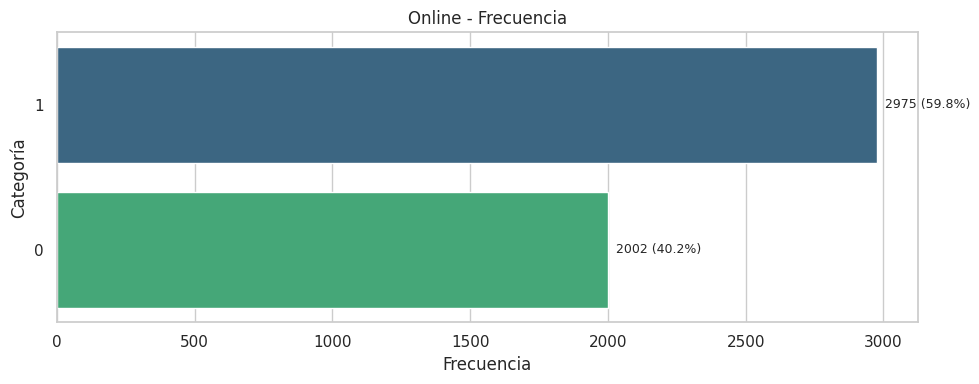

/tmp/ipython-input-2940637073.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),


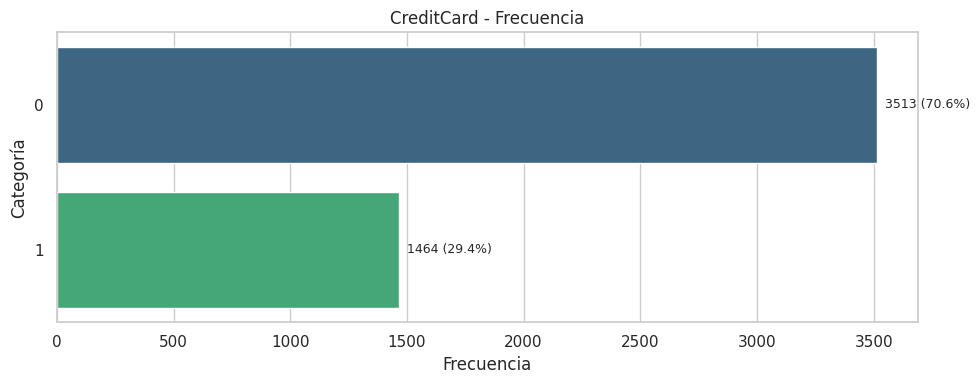

In [19]:
# ================================================
# EDA Categórico: estadísticas + gráficos de barras
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, os

sns.set(style='whitegrid', context='notebook')

# ------------------------------------------------
# 1) Detectar columnas categóricas (object/category)
# ------------------------------------------------
cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()
assert len(cat_cols) > 0, "No se detectaron columnas categóricas (object/category)."

print("Columnas categóricas detectadas:", cat_cols)

# ------------------------------------------------
# 2) Estadísticas descriptivas de categóricas
#    - n_unique, top, freq_top, missing
#    - Frecuencias (Top 10 para imprimir si hay alta cardinalidad)
# ------------------------------------------------
resumen = []
all_freq_records = []   # para un CSV largo con columnas: variable, categoria, count, pct

for c in cat_cols:
    s = loan_df[c].astype('string')  # conserva <NA> como NA nativo
    s_stripped = s.str.strip()

    # Conteos (excluyendo NA para el ranking de categorías)
    vc = s_stripped.value_counts(dropna=False)        # incluye NA al final (si lo hay)
    vc_no_na = s_stripped.dropna().value_counts()     # para porcentajes sin NA

    n_unique = s_stripped.nunique(dropna=True)
    top = vc_no_na.index[0] if not vc_no_na.empty else pd.NA
    freq_top = int(vc_no_na.iloc[0]) if not vc_no_na.empty else 0
    missing = int(s_stripped.isna().sum())

    resumen.append({
        'columna': c,
        'n_unique': n_unique,
        'top': top,
        'freq_top': freq_top,
        'missing': missing
    })

    # Imprimir frecuencias (Top 10 si alta cardinalidad)
    print(f"\n===== Frecuencias en '{c}' =====")
    if n_unique > 10:
        print("(Alta cardinalidad) Top 10 categorías:")
        print(vc_no_na.head(10))
    else:
        # Mostrar todas las categorías no nulas
        print(vc_no_na)

    # Construir tabla larga para exportación (porcentajes respecto a no-NA)
    denom = max(vc_no_na.sum(), 1)
    for cat_val, cnt in vc_no_na.items():
        all_freq_records.append({
            'variable': c,
            'categoria': cat_val,
            'count': int(cnt),
            'pct': float(cnt / denom)
        })

# Tabla resumen de categóricas
summary_cats = pd.DataFrame(resumen).sort_values('columna')
print("\n=== Resumen descriptivo (categóricas) ===")
print(summary_cats)

# (Opcional) Exportar frecuencias en formato largo
freq_long_df = pd.DataFrame(all_freq_records)
# freq_long_df.to_csv('categorical_frequencies_long.csv', index=False)

# ------------------------------------------------
# 3) Gráficos de barras por variable
#    - Para alta cardinalidad (>10) graficar sólo Top 10
#    - Barras horizontales para legibilidad
#    - Se anotan conteos y % (respecto a no-NA)
# ------------------------------------------------
save_figs = False                # Cambia a True si quieres guardar los PNG
out_dir = "fig_categoricas"      # Carpeta de salida si save_figs=True
top_k = 10

if save_figs and not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)

for c in cat_cols:
    s = loan_df[c].astype('string').str.strip()
    vc_no_na = s.dropna().value_counts()
    n_unique = vc_no_na.shape[0]

    # Selección de datos para graficar
    data_to_plot = vc_no_na.head(top_k) if n_unique > top_k else vc_no_na
    denom = max(vc_no_na.sum(), 1)
    pct_vals = (data_to_plot / denom * 100).round(2)

    # Figura (barras horizontales)
    plt.figure(figsize=(10, max(4, 0.4 * len(data_to_plot))))
    ax = sns.barplot(x=data_to_plot.values, y=data_to_plot.index.astype(str),
                     palette='viridis')

    # Títulos y etiquetas
    ttl = f"{c} - Frecuencia"
    if n_unique > top_k:
        ttl += f" (Top {top_k} de {n_unique})"
    plt.title(ttl)
    plt.xlabel("Frecuencia")
    plt.ylabel("Categoría")

    # Anotar conteo y % al final de cada barra
    for i, (cnt, pct) in enumerate(zip(data_to_plot.values, pct_vals.values)):
        ax.text(cnt, i, f"  {cnt} ({pct:.1f}%)",
                va='center', ha='left', fontsize=9)

    plt.tight_layout()

    if save_figs:
        fname = f"{out_dir}/bar_{c.replace(' ','_')}.png"
        plt.savefig(fname, dpi=140)
        print(f"Figura guardada: {fname}")

    plt.show()

# ------------------------------------------------
# 4) (Opcional) Exportar resumen y frecuencias a CSV
# ------------------------------------------------
# summary_cats.to_csv('categorical_summary_stats.csv', index=False)
# freq_long_df.to_csv('categorical_frequencies_long.csv', index=False)

# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

<Figure size 1200x1200 with 0 Axes>

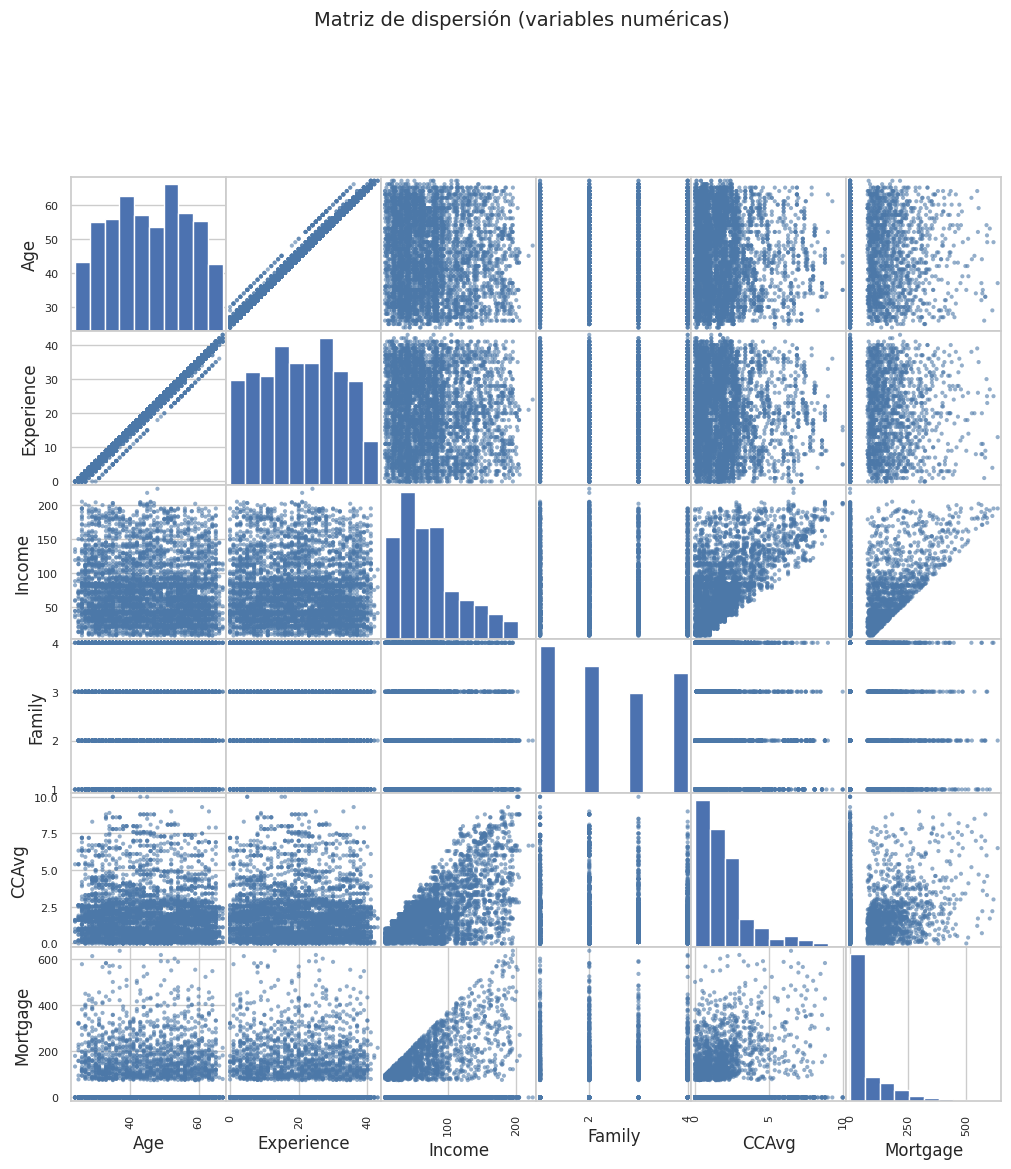

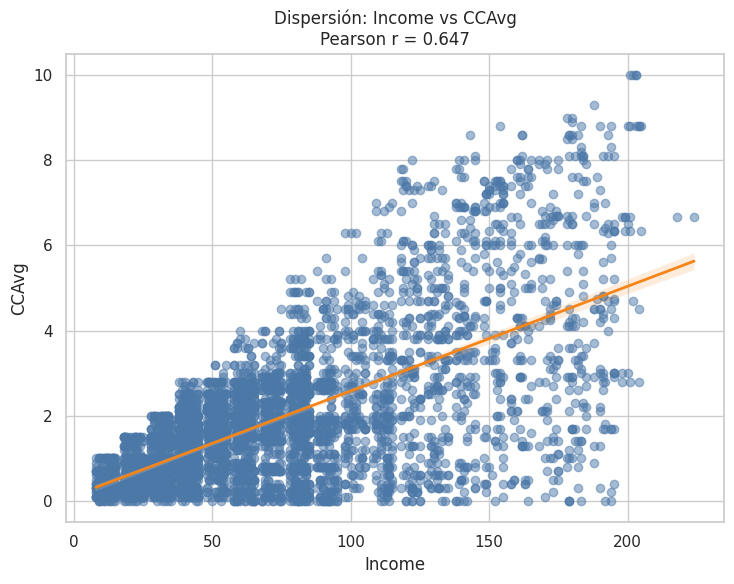

=== Par representativo seleccionado ===
- Par: (Income, CCAvg)
- Pearson r = 0.647
- Descripción: Relación positiva fuerte (r = 0.647). Tendencia aproximadamente lineal es visible en la nube de puntos.


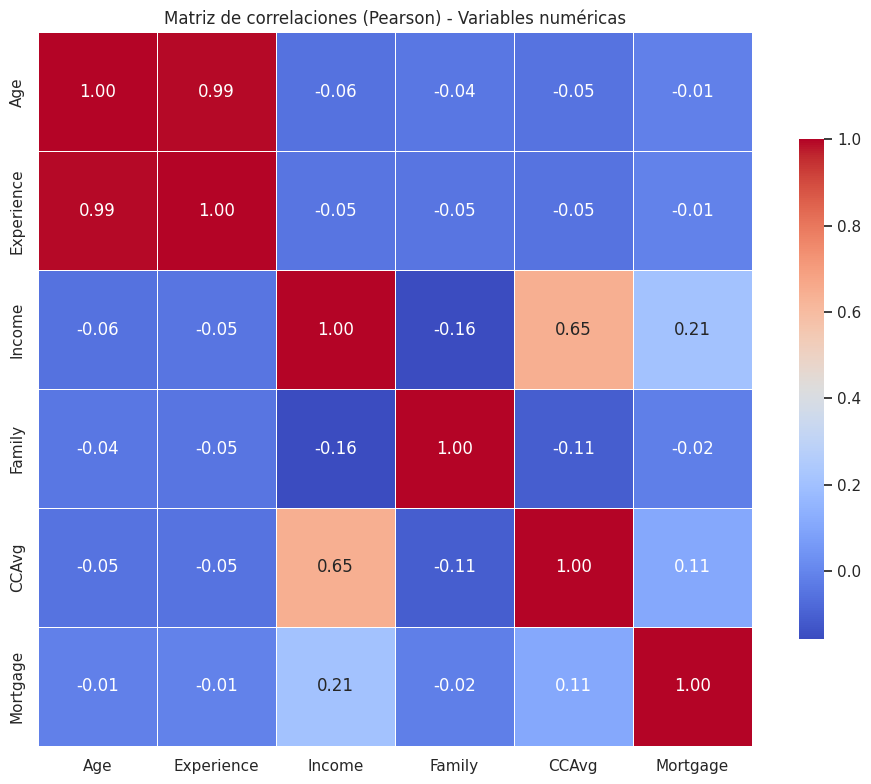


=== Verificación con lo esperado ===
- Pendiente estimada (recta de regresión): 0.0246
- Coincidencia visual vs. r: Sí, el valor de Pearson coincide con la tendencia observada (signo y fuerza consistentes).


In [20]:
# ======================================================
# EDA Bivariado: Scatter Matrix + Par representativo + Heatmap
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

sns.set(style='whitegrid', context='notebook')

# ------------------------------------------------------
# 1) Seleccionar columnas numéricas (excluye ID si está)
# ------------------------------------------------------
num_cols = [c for c in loan_df.columns if pd.api.types.is_numeric_dtype(loan_df[c])]
if 'ID' in num_cols:
    num_cols.remove('ID')

assert len(num_cols) >= 2, "Se requieren al menos 2 variables numéricas para el análisis bivariado."

# ------------------------------------------------------
# 2) Scatter matrix (todas las numéricas)
# ------------------------------------------------------
fig = plt.figure(figsize=(12, 12))
axs = scatter_matrix(loan_df[num_cols], figsize=(12, 12), diagonal='hist', color='#4C78A8', alpha=0.6)
plt.suptitle('Matriz de dispersión (variables numéricas)', y=1.02, fontsize=14)
plt.show()

# ------------------------------------------------------
# 3) Correlaciones de Pearson (para selección de par y heatmap)
# ------------------------------------------------------
corr = loan_df[num_cols].corr(method='pearson')

# Selección del par representativo:
# - Si existen Income y CCAvg, usa ese par.
# - En caso contrario, el par con mayor |correlación| (excluyendo diagonal).
candidate_pair = None
if {'Income', 'CCAvg'}.issubset(num_cols):
    candidate_pair = ('Income', 'CCAvg')
else:
    # Tomar el par con mayor |corr| fuera de la diagonal
    cm = corr.copy()
    np.fill_diagonal(cm.values, np.nan)
    # Convertir a serie (MultiIndex) y tomar idx de máximo absoluto
    pair_idx = cm.abs().unstack().dropna()
    # Evitar duplicados (A,B) y (B,A): filtrar upper triangle
    pair_idx = pair_idx[pair_idx.index.get_level_values(0) < pair_idx.index.get_level_values(1)]
    candidate_pair = pair_idx.idxmax()

x_var, y_var = candidate_pair
pearson_val = float(corr.loc[x_var, y_var])

# ------------------------------------------------------
# 4) Scatter del par representativo + recta de regresión
# ------------------------------------------------------
plt.figure(figsize=(7.5, 6))
ax = sns.regplot(data=loan_df, x=x_var, y=y_var,
                 scatter_kws={'alpha':0.5, 'color':'#4C78A8'},
                 line_kws={'color':'#F58518', 'lw':2})
plt.title(f'Dispersión: {x_var} vs {y_var}\nPearson r = {pearson_val:.3f}')
plt.xlabel(x_var); plt.ylabel(y_var)
plt.tight_layout()
plt.show()

# Descripción automática del patrón observado (según r)
def describe_corr(r):
    ar = abs(r)
    if ar < 0.2:  strength = 'muy débil'
    elif ar < 0.4: strength = 'débil'
    elif ar < 0.6: strength = 'moderada'
    elif ar < 0.8: strength = 'fuerte'
    else:          strength = 'muy fuerte'
    direction = 'positiva' if r > 0 else ('negativa' if r < 0 else 'nula')
    base = f"Relación {direction} {strength} (r = {r:.3f})."
    if ar >= 0.4:
        base += " Tendencia aproximadamente lineal es visible en la nube de puntos."
    else:
        base += " La nube de puntos muestra alta dispersión y patrón poco definido."
    return base

print("=== Par representativo seleccionado ===")
print(f"- Par: ({x_var}, {y_var})")
print(f"- Pearson r = {pearson_val:.3f}")
print(f"- Descripción: {describe_corr(pearson_val)}")

# ------------------------------------------------------
# 5) Heatmap de correlación de Pearson (todas las numéricas)
# ------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={'shrink': 0.7}, linewidths=0.5)
plt.title('Matriz de correlaciones (Pearson) - Variables numéricas')
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 6) ¿El valor del par coincide con lo esperado?
#    - Heurística simple: si r>0, esperamos nube ascendente; si r<0, descendente.
# ------------------------------------------------------
x = loan_df[x_var].values
y = loan_df[y_var].values
# Pendiente por regresión lineal simple
coef = np.polyfit(x[~np.isnan(x) & ~np.isnan(y)], y[~np.isnan(x) & ~np.isnan(y)], 1)[0]
sign_match = (pearson_val == 0 and abs(coef) < 1e-9) or (pearson_val * coef > 0)
msg_match = "Sí, el valor de Pearson coincide con la tendencia observada (signo y fuerza consistentes)." if sign_match \
            else "Parcialmente: el signo o la fuerza no parecen coincidir visualmente."
print("\n=== Verificación con lo esperado ===")
print(f"- Pendiente estimada (recta de regresión): {coef:.4f}")
print(f"- Coincidencia visual vs. r: {msg_match}")

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.


Dataset para bivariado: 4977 filas con 'Personal Loan' en {0,1}.
Numéricas: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Categóricas (sin ZIP Code): ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


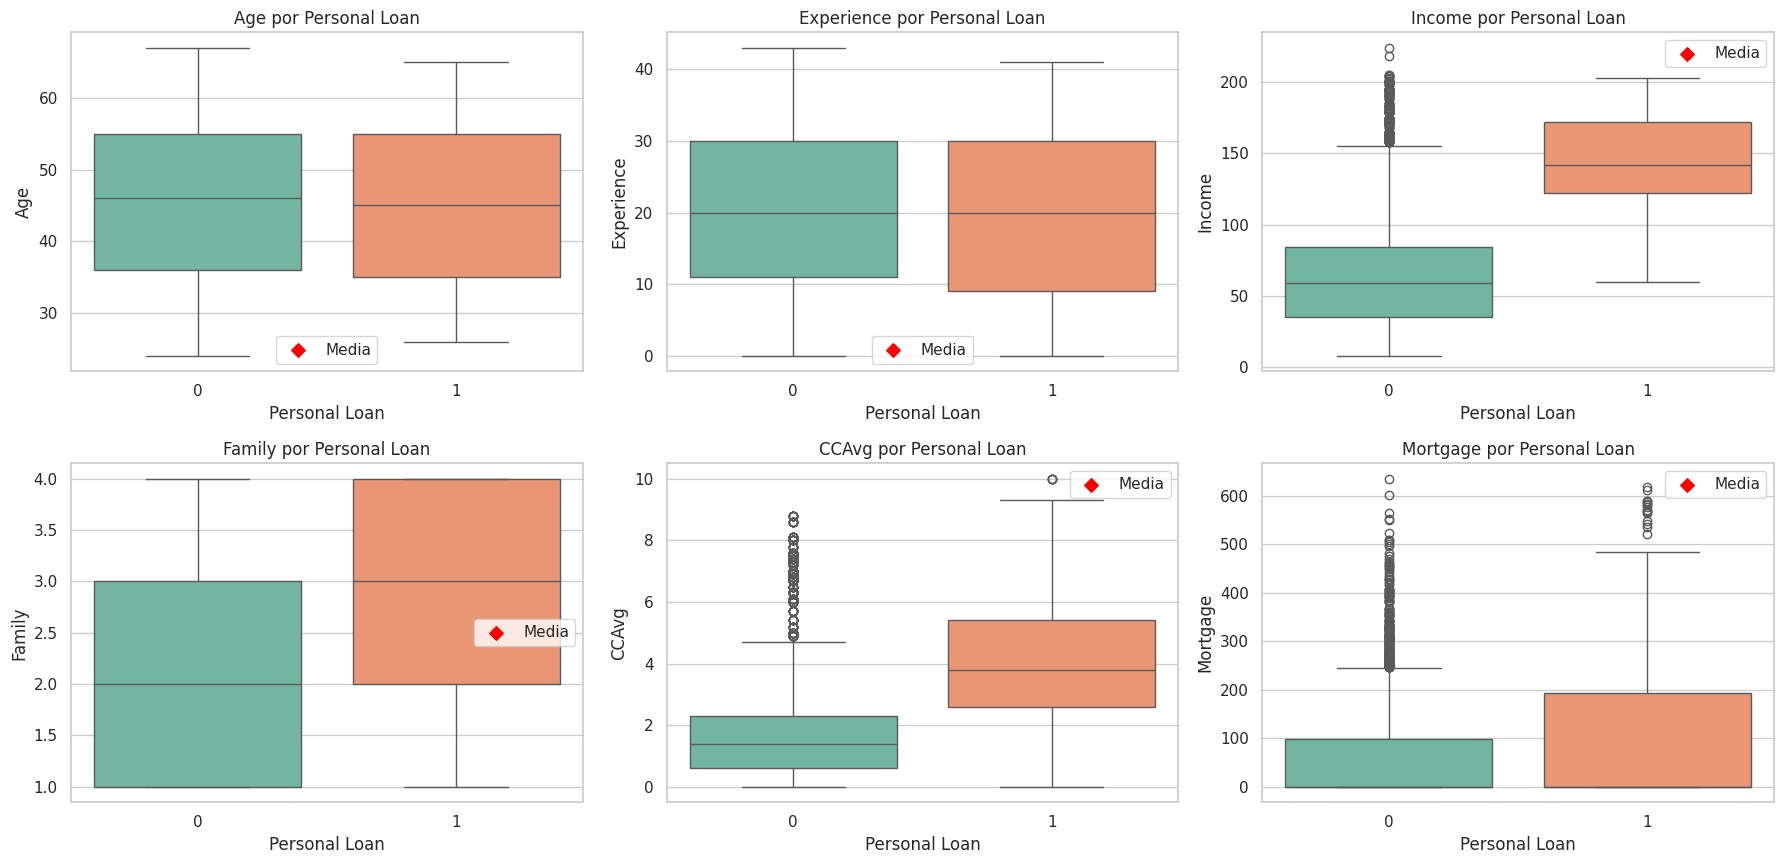

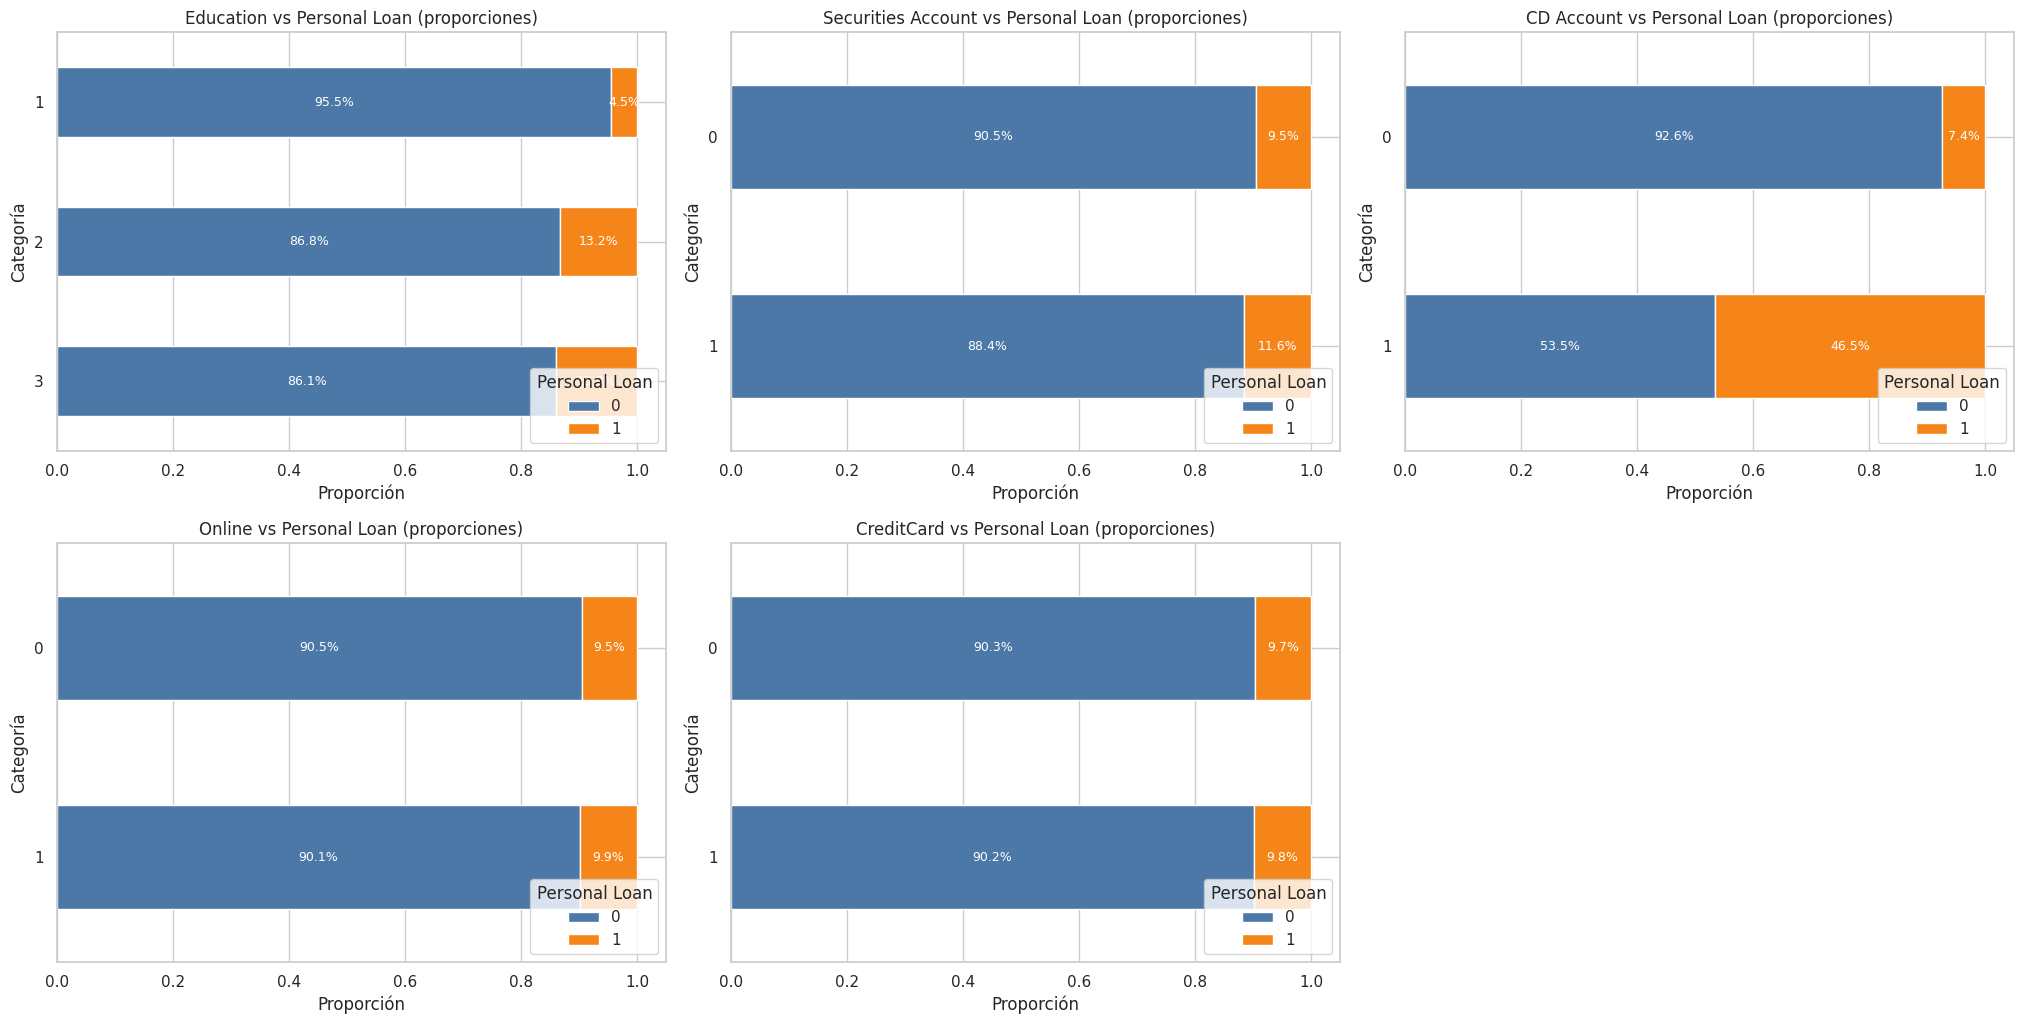


=== Hallazgos automáticos ===

[Numéricas] Variables con mayor separación de mediana (PL=1 vs PL=0):
Personal Loan  delta_median
Income                 83.0
CCAvg                   2.4
Family                  1.0
Age                    -1.0
Experience              0.0
• Income: mediana mayor cuando PL=1 (Δ≈ 83.00).
• CCAvg: mediana mayor cuando PL=1 (Δ≈ 2.40).
• Family: mediana mayor cuando PL=1 (Δ≈ 1.00).

[Categóricas] Variables con mayor dispersión de tasa de préstamo entre categorías:
             variable  spread (pp)
0          CD Account         39.2
1           Education          9.4
2  Securities Account          2.0
3              Online          0.4
4          CreditCard          0.1

Comentarios por variable (top contrastes):
• Education: mayor tasa en '3' (13.9%), menor en '1' (4.5%). Δ=9.4 pp
• Securities Account: mayor tasa en '1' (11.6%), menor en '0' (9.5%). Δ=2.0 pp
• CD Account: mayor tasa en '1' (46.5%), menor en '0' (7.4%). Δ=39.2 pp
• Online: mayor tasa en '1' (9

In [21]:
# ============================================================
# Bivariado vs. Personal Loan: Boxplots (num) + Barras apiladas (cat)
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, os, warnings

warnings.filterwarnings("ignore")
sns.set(style='whitegrid', context='notebook')

# ---------------------------------------------
# 0) Normalización/validación de 'Personal Loan'
# ---------------------------------------------
assert 'Personal Loan' in loan_df.columns, "No se encontró la columna 'Personal Loan'."

def to_binary(x):
    if pd.isna(x): return np.nan
    t = str(x).strip().lower()
    truthy = {'1','yes','y','si','sí','true','t'}
    falsy  = {'0','no','n','false','f'}
    if t in truthy: return 1
    if t in falsy:  return 0
    # si es numérico 0/1 en string
    try:
        v = float(t)
        if v in (0.0, 1.0): return int(v)
    except:
        pass
    return np.nan

pl_tmp = loan_df['Personal Loan'].map(to_binary)
# Mantén sólo observaciones con target válido 0/1 (para comparabilidad)
loan_df = loan_df[pl_tmp.isin([0,1])].copy()
loan_df['Personal Loan'] = pl_tmp.astype('int').astype('category')

print(f"Dataset para bivariado: {loan_df.shape[0]} filas con 'Personal Loan' en {{0,1}}.")

# ---------------------------------------------
# 1) Columnas numéricas y categóricas
# ---------------------------------------------
num_cols = [c for c in loan_df.columns
            if pd.api.types.is_numeric_dtype(loan_df[c]) and c not in ['ID'] and c != 'Personal Loan']
cat_cols = [c for c in loan_df.columns
            if loan_df[c].dtype.name in ['object','category'] and c not in ['Personal Loan']]
cat_no_zip = [c for c in cat_cols if c != 'ZIP Code']

print("Numéricas:", num_cols)
print("Categóricas (sin ZIP Code):", cat_no_zip)

# ---------------------------------------------------------
# 2) BOX PLOTS (numéricas) por valor de Personal Loan
#    - Incluye marcador de la MEDIA por grupo (rombo rojo)
# ---------------------------------------------------------
if len(num_cols) > 0:
    cols = 3
    rows = math.ceil(len(num_cols) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.4*rows))
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.boxplot(x='Personal Loan', y=col, data=loan_df, ax=ax, palette='Set2')
        # Medias por grupo (PL=0/1)
        grp_means = loan_df.groupby('Personal Loan')[col].mean()
        for j, (pl_val, mean_v) in enumerate(grp_means.items()):
            ax.scatter(j, mean_v, color='red', marker='D', s=48,
                       label='Media' if j == 0 else None)
        ax.set_title(f'{col} por Personal Loan')
        ax.legend(loc='best')

    # Apaga ejes sobrantes si los hay
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas para graficar.")

# ---------------------------------------------------------
# 3) BARRAS APILADAS (categóricas) sin ZIP Code
#    - Distribución relativa de Personal Loan en cada categoría
# ---------------------------------------------------------
if len(cat_no_zip) > 0:
    cols = 3
    rows = math.ceil(len(cat_no_zip) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6.8*cols, 5.2*rows))
    axes = np.atleast_1d(axes).ravel()

    for i, c in enumerate(cat_no_zip):
        ax = axes[i]
        tab = pd.crosstab(loan_df[c].astype(str), loan_df['Personal Loan'].astype(int), normalize='index')
        # Ordena categorías por tasa de PL=1 descendente (más ilustrativo)
        if 1 in tab.columns:
            tab = tab.sort_values(by=1, ascending=False)
        # Asegura columnas 0 y 1 en orden
        for col_miss in [0,1]:
            if col_miss not in tab.columns:
                tab[col_miss] = 0.0
        tab = tab[[0,1]]

        # Barras horizontales apiladas (mejor legibilidad)
        tab.plot(kind='barh', stacked=True, ax=ax, color=['#4C78A8','#F58518'], edgecolor='white')
        ax.set_title(f'{c} vs Personal Loan (proporciones)')
        ax.set_xlabel('Proporción'); ax.set_ylabel('Categoría')
        ax.legend(title='Personal Loan', loc='lower right')

        # Anotar % dentro de cada segmento (opcional)
        for yi, (idx, row) in enumerate(tab.iterrows()):
            left = 0.0
            for k, val in enumerate([row[0], row[1]]):
                if val > 0.04:  # anotar sólo si es suficientemente grande
                    ax.text(left + val/2, yi, f"{val*100:.1f}%",
                            va='center', ha='center', color='white', fontsize=9)
                left += val

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas categóricas (excluyendo ZIP Code).")

# ---------------------------------------------------------
# 4) HALLAZGOS AUTOMÁTICOS (texto)
#    - Numéricas: delta de medianas por target (PL=1 - PL=0)
#    - Categóricas: dispersión de tasas por categoría
# ---------------------------------------------------------
print("\n=== Hallazgos automáticos ===")

# ----- Numéricas -----
if len(num_cols) > 0:
    med = loan_df.groupby('Personal Loan')[num_cols].median().T
    # Asegúrate de que hay ambas clases
    if set(loan_df['Personal Loan'].cat.categories) == {0,1} or set(loan_df['Personal Loan'].unique()) == {0,1}:
        med['delta_median'] = med.get(1, np.nan) - med.get(0, np.nan)
        med['abs_delta'] = med['delta_median'].abs()
        med_sorted = med.sort_values('abs_delta', ascending=False)
        print("\n[Numéricas] Variables con mayor separación de mediana (PL=1 vs PL=0):")
        print(med_sorted[['delta_median']].head(5).round(3))
        # Comentario corto
        top_num = med_sorted.head(3)['delta_median']
        for var, delta in top_num.items():
            trend = "mayor" if delta > 0 else "menor"
            print(f"• {var}: mediana {trend} cuando PL=1 (Δ≈ {delta:.2f}).")
    else:
        print("\n[Numéricas] No hay ambas clases de PL para comparar medianas.")
else:
    print("\n[Numéricas] Sin variables para resumir.")

# ----- Categóricas -----
if len(cat_no_zip) > 0:
    print("\n[Categóricas] Variables con mayor dispersión de tasa de préstamo entre categorías:")
    dispersions = []
    top_cats_comments = []
    for c in cat_no_zip:
        rates = loan_df.groupby(c)['Personal Loan'].apply(lambda s: s.astype(int).mean())
        if len(rates) >= 2:
            spread = float(rates.max() - rates.min())
            dispersions.append((c, spread))
            # Top y bottom categoría por tasa
            top_cat = rates.idxmax(); top_val = float(rates.max())
            low_cat = rates.idxmin(); low_val = float(rates.min())
            top_cats_comments.append(
                f"• {c}: mayor tasa en '{top_cat}' ({top_val*100:.1f}%), menor en '{low_cat}' ({low_val*100:.1f}%). Δ={spread*100:.1f} pp"
            )
    if dispersions:
        dispersions = sorted(dispersions, key=lambda x: x[1], reverse=True)
        print(pd.DataFrame(dispersions, columns=['variable','spread_tasa']).head(5).assign(spread_tasa=lambda d: (d['spread_tasa']*100).round(1)).rename(columns={'spread_tasa':'spread (pp)'}))
        print("\nComentarios por variable (top contrastes):")
        for line in top_cats_comments[:5]:
            print(line)
    else:
        print("[Categóricas] No se pudo calcular la dispersión de tasas (¿una sola categoría?).")
else:
    print("\n[Categóricas] Sin variables para resumir.")